In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from matplotlib import font_manager, rc
#한글 처리를 위해 폰트 설정
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [2]:
import random
# BMI를 계산해서 레이블을 리턴하는 함수
# thin 1, normal 2, fat 3
def calc_bmi(h, w):
    bmi = w / (h/100) ** 2
    if bmi < 18.5: return "1"
    if bmi < 25: return "2"
    return "3"

In [3]:
# 출력 파일 준비하기
fp = open("../data/bmi/bmi.csv", "w", encoding="utf-8")
fp.write("height,weight,label\n")

# 무작위로 데이터 생성하기
cnt = {"1":0, "2":0, "3":0}
for i in range(20000):
    h = random.randint(120, 200)
    w = random.randint(35, 80)
    label = calc_bmi(h, w)
    cnt[label] += 1
    fp.write(f"{h}, {w}, {label}\n")

fp.close()
print(cnt, "건의 데이터가 생성되었습니다.")

{'1': 6430, '2': 5984, '3': 7586} 건의 데이터가 생성되었습니다.


In [4]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
# 데이터 로딩
df = pd.read_csv("../data/bmi/bmi.csv")
df.head()

,height,weight,label
0,187,55,1
1,198,60,1
2,124,78,3
3,149,47,2
4,141,48,2


In [5]:
train_cols = df.columns[0:2]
X = df[train_cols]
y = df['label']

In [6]:
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import font_manager, rc
#한글 처리를 위해 폰트 설정
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

Text(0, 0.5, '빈도')

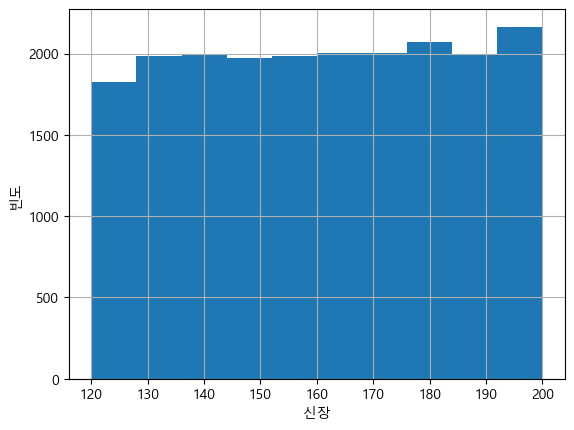

In [7]:
df["height"].hist()
plt.xlabel("신장")
plt.ylabel("빈도")

Text(0, 0.5, '빈도')

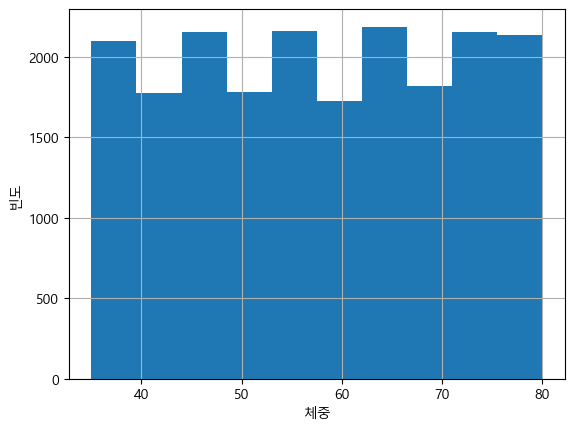

In [8]:
df["weight"].hist()
plt.xlabel("체중")
plt.ylabel("빈도")

Text(0, 0.5, '빈도')

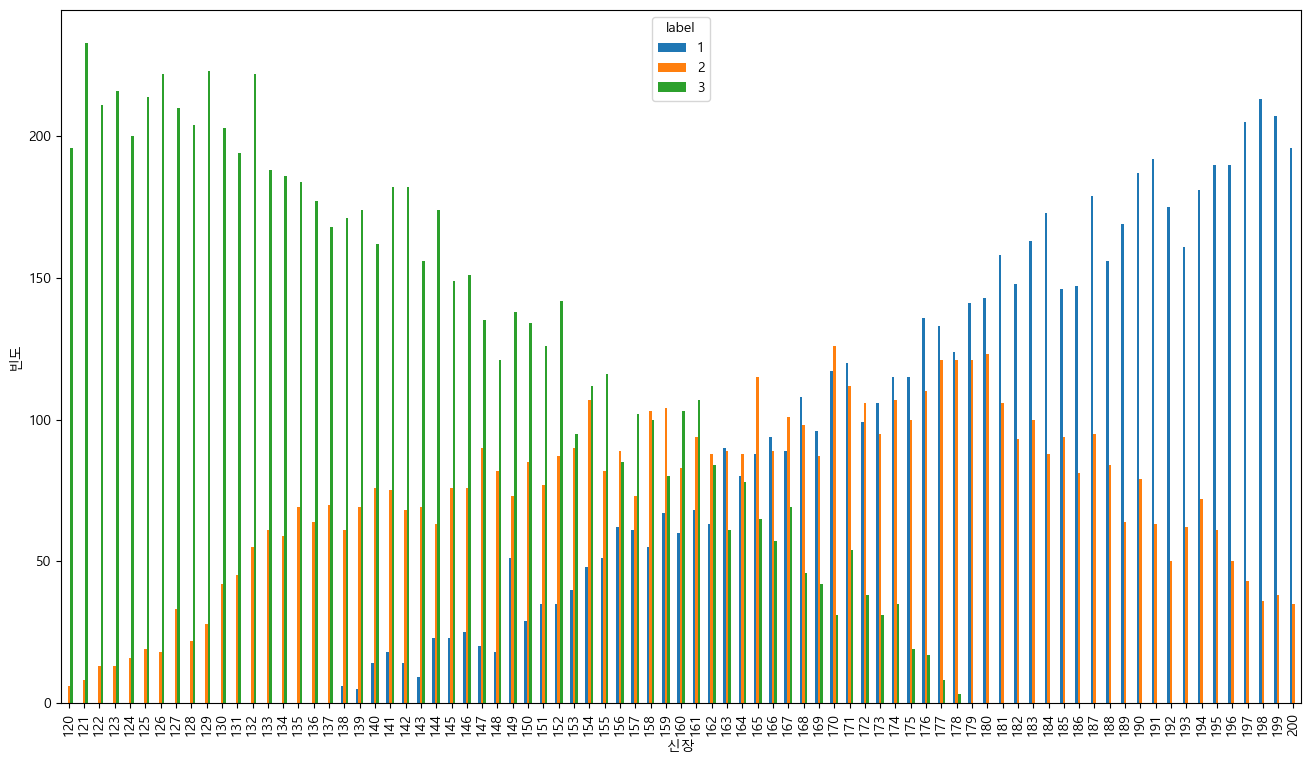

In [10]:
plt.rcParams["figure.figsize"] = (16, 9) # 교차분석표
pd.crosstab(df["height"], df.label).plot(kind="bar")
plt.xlabel("신장")
plt.ylabel("빈도")

Text(0, 0.5, '빈도')

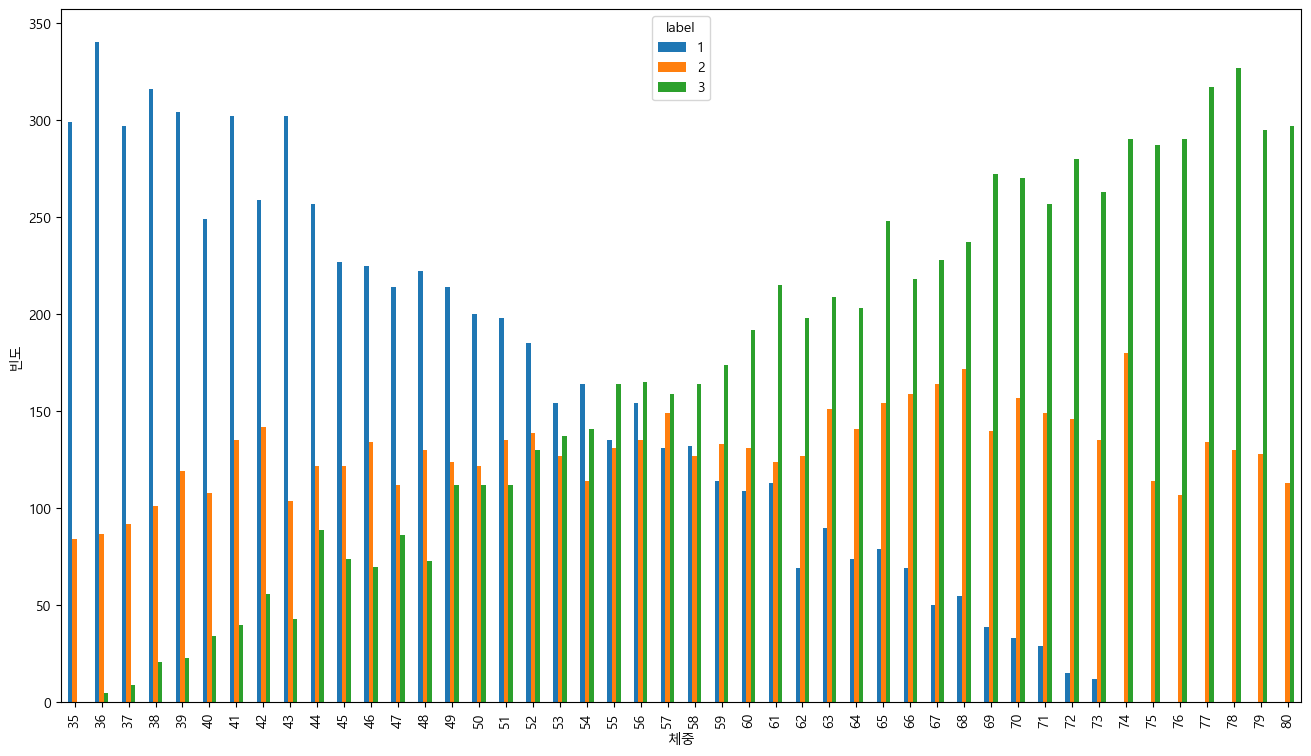

In [11]:
plt.rcParams["figure.figsize"] = (16, 9) # 교차분석표
pd.crosstab(df["weight"], df.label).plot(kind="bar")
plt.xlabel("체중")
plt.ylabel("빈도")

In [29]:
df['label'].value_counts()

3    7586
1    6430
2    5984
Name: label, dtype: int64

c:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, '분류\n (1: thin, 2: normal, 3: fat)')

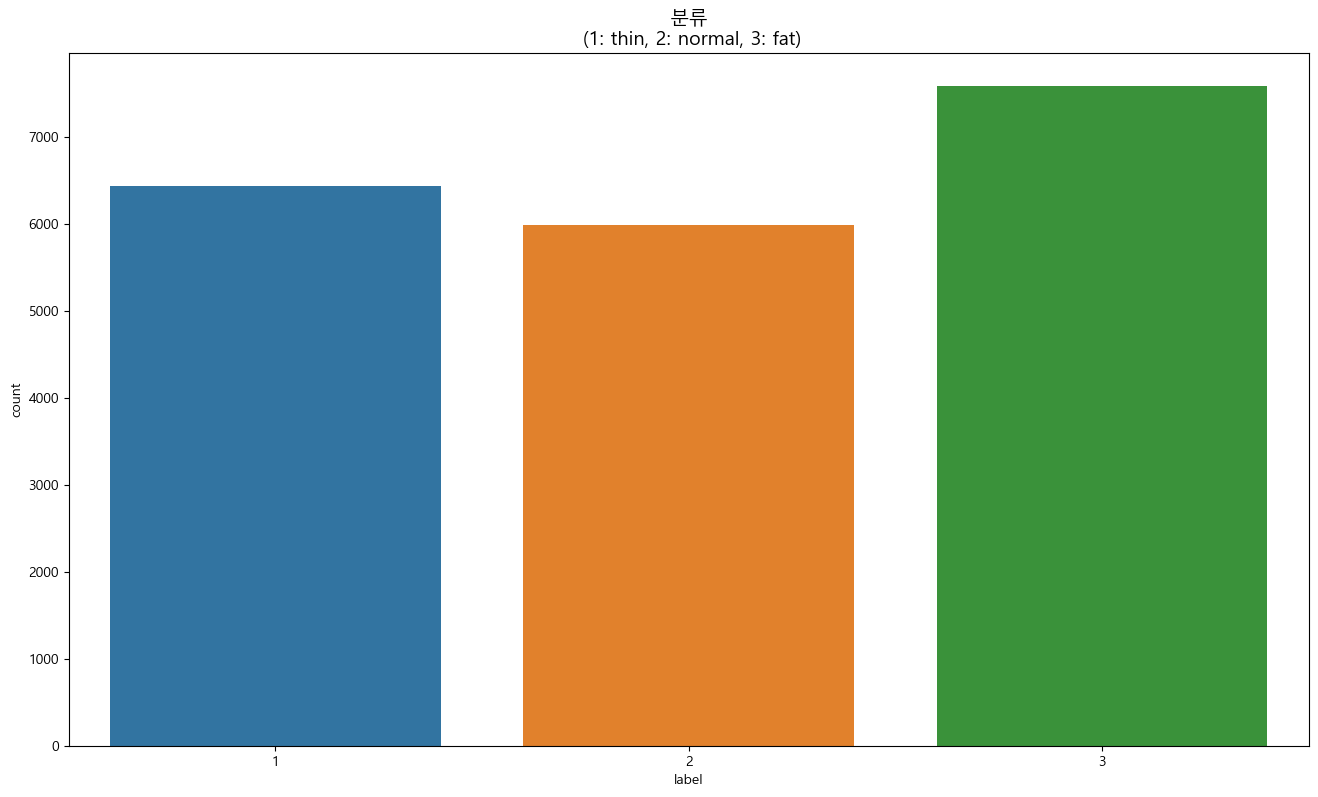

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
%matplotlib inline
#한글 처리를 위해 폰트 설정
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
sns.countplot('label', data=df)
plt.title('분류\n (1: thin, 2: normal, 3: fat)', fontsize=14)

c:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, '분류\n (1: thin, 2: normal, 3: fat)')

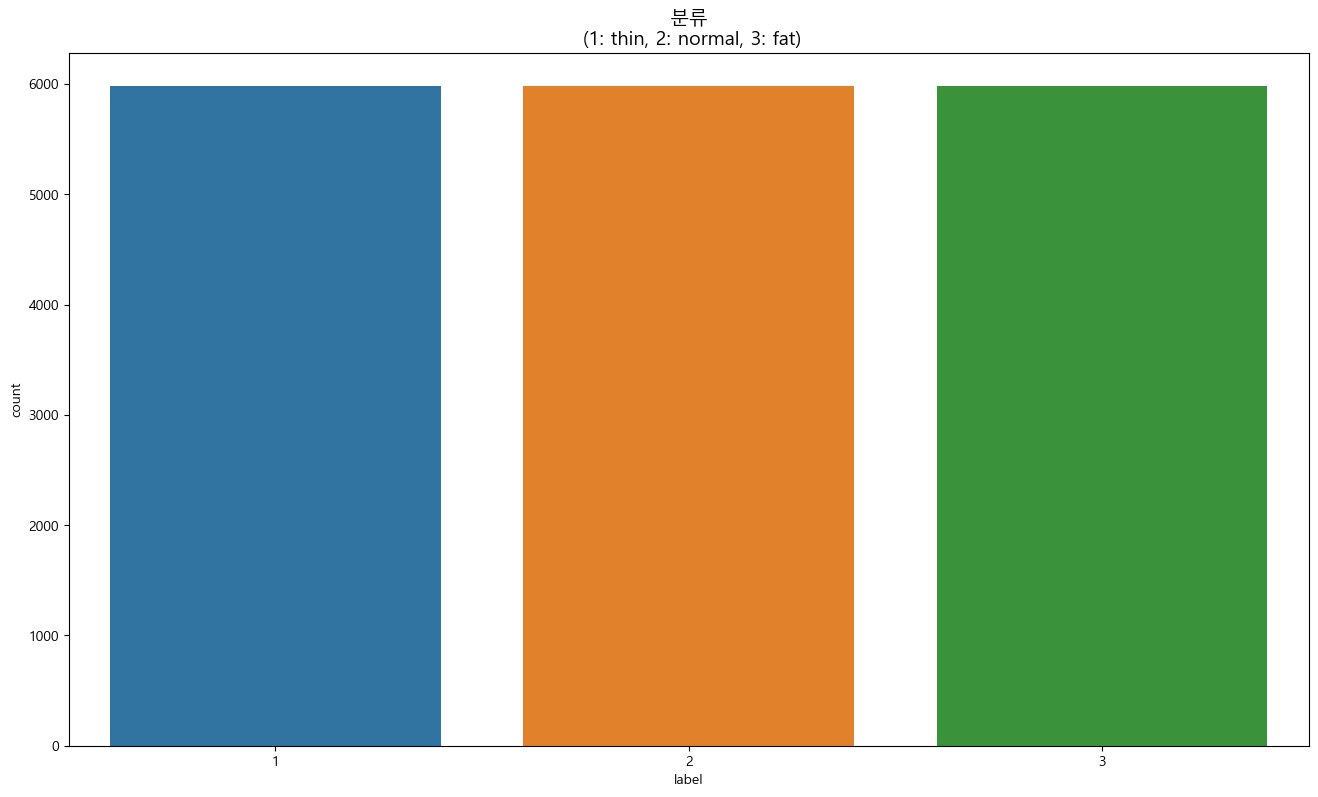

In [14]:
#언더샘플링
from imblearn.under_sampling import RandomUnderSampler
X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X, y)
X_samp = pd.DataFrame(data=X_sample,columns=train_cols )
y_samp = pd.DataFrame(data=y_sample,columns=['label'])
df2=pd.concat([X_samp,y_samp],axis=1)

sns.countplot('label', data=df2)
plt.title('분류\n (1: thin, 2: normal, 3: fat)', fontsize=14)

In [15]:
train_cols = ['height', 'weight']
X = X_samp[train_cols]
y = y_samp['label']

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)
model = LogisticRegression()
model.fit(X_train, y_train)
print("학습용:",model.score(X_train, y_train))
print("검증용:",model.score(X_test, y_test))

학습용: 0.9798760531996379
검증용: 0.9813422445001392


In [19]:
# confusion matrix(혼동행렬, 오분류표) 출력
from sklearn.metrics import confusion_matrix
pred = model.predict(X_test)
cm = confusion_matrix(y_test, pred)
df_cm=pd.DataFrame(cm, index=[1,2,3],
columns=[1,2,3])
df_cm

,1,2,3
1,1182,15,0
2,14,1168,15
3,0,23,1174


<AxesSubplot:title={'center':'Confusion Matrix'}>

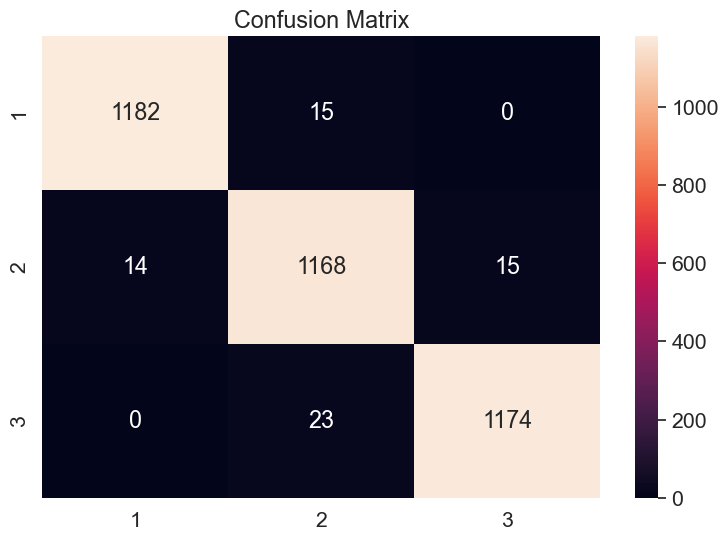

In [20]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
sns.set(font_scale=1.4)
plt.figure(figsize=(9,6))
plt.title("Confusion Matrix")
sns.heatmap(df_cm, annot=True,fmt="d")
# 색상이 밝으면 높은 숫자, 색상이 어두우면 낮은 숫자